#### Note

For this to work ensure that:

1. The class labels are encoded as numeric values (0,1,2 ...)
2. The data is on the same scale (standardized)
3. The labels are categorical. This KNN does not work on continouus values
4. The distance is measured via euclidean distance which can not be changed for now
5. k % 2 != 0 ; Otherwise ties in the vote will be resolved randomly

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

###### Params: 

input_space = 2-Dimensional matrix representing the input-values

data_point = the [x,y] data point to be classified

###### returns:

An ordered List of indicies, that correspond to the data-points of the input space. Ordered from close (data-point that is nearest) to far (data-point in the input space that is farthest from the point to be classified)

The distances are measured using eucledian distance measure

In [3]:
def euclideanDistanceMatrix(input_space, data_point):
    dist = pow((input_space - data_point),2)
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    return dist.argsort()

###### Params: 

distance_matrix = ordered list of indicies, that point to the closest / farthest data_points

y_train = The labels from the input_space

k = number of nearest-neighbors that shall be used in the vote

###### returns:
The result of the majority vote (= the label that is most common)


In [4]:
def majority_vote(distance_matrix, y_train, k):
    label=[]
    for x in range(k):
        label.append(y_train[distance_matrix[x]])
    counts = np.bincount(label)
    return np.argmax(counts)

##### Description

This is just a helper function, tieing the two functions above together

###### Params: 

input_space = 2-Dimensional matrix representing the input values

input_labels = The labels from the input space

X_test = 2-Dimensional matrix representing the values whose label shall be predicted

k = number of nearest-neighbors that shall be used in the vote defaults to three. 

###### returns:
An array of label-predictions on X_test


In [5]:
def knn(input_space, input_labels, X_test, k=3):
    y_predict = []
    for data_point in X_test:
        indicies = euclideanDistanceMatrix(input_space, data_point)
        label = majority_vote(indicies, input_labels, k)
        y_predict.append(label)
    return y_predict

###### Params: 

y_test = The (true) labels from the test data X_test

y_predict = The predicted labels from the knn algorithm on X_test


###### returns:
The number of missclassified samples


In [6]:
def indicator_loss(y_test, y_predict):
    n_missclassified = 0
    for idx, elem in enumerate(y_test):
        if elem != y_predict[idx]:
            n_missclassified +=1
    return n_missclassified / len(y_test)

#### Generate test data

In [7]:
np.random.seed()
input_space_1 =  np.random.randint(low=0, high=60, size=(20,2))
input_labels_1 =  np.zeros(20)

input_space_2 =  np.random.randint(low=30, high=80, size=(20,2))
input_labels_2 =  np.ones(20)

input_space = np.vstack((input_space_1, input_space_2))
input_labels = np.hstack((input_labels_1, input_labels_2))

X_test_1 =  np.random.randint(low=0, high=60, size=(10,2))
y_test_1 =  np.zeros(10)
X_test_2 = np.random.randint(low=30, high=80, size=(10,2))
y_test_2 = np.ones(10)

X_test = np.vstack((X_test_1, X_test_2))
y_test = np.hstack((y_test_1, y_test_2))

# standardize data 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(input_space)
input_space = sc.transform(input_space)
X_test = sc.transform(X_test)

C:\Users\hagen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


#### Use knn to predict test-labels

In [8]:
y_predict = knn(input_space, input_labels, X_test, k=5)

#### Calculate indicator loss

In [9]:
indicator_loss(y_test, y_predict)

0.2

#### Visualization

In [10]:
## Plot input_space and input labels

markers = ['s', 'x']
for idx, cl in enumerate(np.unique(input_labels)):
    plt.scatter(x=input_space[input_labels==cl, 0], y=input_space[input_labels==cl, 1],
               marker=markers[idx], label=cl)
    
plt.legend(loc='upper left')

#plt.show()


##### Show decision boundaries (adapted from Sebastian Raschkas book 'Python Machine Learning' chapter 2)

In [11]:
# get combined datasets
X_combined = np.vstack((input_space, X_test))
y_combined = np.hstack((input_labels, y_test))

# setup marker generator and color map
markers = ('s', 'x', 'o', '^', 'v')
colors = ('blue', 'red', 'lightgreen', 'gray', 'cyan')
cmap = ListedColormap(colors[:len(np.unique(y_predict))])

# plot the decision surface
x1_min, x1_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
x2_min, x2_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
mesh_test = np.array([xx1.ravel(), xx2.ravel()]).T
Z = knn(input_space=input_space, input_labels=input_labels, X_test=mesh_test, k=5)
Z = np.array(Z)
Z = Z.reshape(xx1.shape)
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

# plot class samples
for idx, cl in enumerate(np.unique(y_combined)):
    plt.scatter(x=X_combined[y_combined==cl, 0], y=X_combined[y_combined==cl, 1],
               marker=markers[idx], label=cl, alpha=0.8, cmap=cmap(idx))

# Mark test data
plt.scatter(X_test[:, 0], X_test[:,1], c='', alpha=1.0, linewidths=1, marker='o', edgecolor='black', s=55, label='test')

plt.legend(loc='upper left')
#plt.show()

#### compare k to indicator-loss function

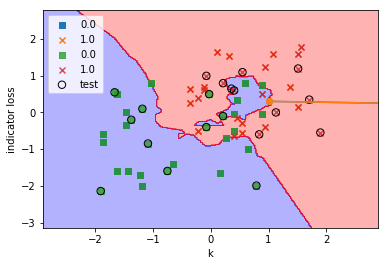

In [13]:
losses = []
for k in range(1,len(input_space), 2):
    y_predict = knn(input_space=input_space, input_labels=input_labels, X_test=X_test, k=k)
    loss = indicator_loss(y_test=y_test, y_predict=y_predict)
    losses.append(loss)
plt.plot(range(1,len(input_space), 2) , losses, marker='o')
plt.xlabel('k')
plt.ylabel('indicator loss')
plt.show()